# Processing Times and Dates in Python

Almost all data we are working with so far include plain-text time data, that we need to carefully manipulate. 
--> We need some better representation of time

In this notebook we'll cover a few functions:
* `Time.strptime`: convert a time string to a structured time object
* `Time.strftime`: convert a time object to a string
* `Time.mktime` / `calendar.timegm`: convert a time object to a number
* `Time.gmtime`: convert a number to a time object

We have three possible representations of time

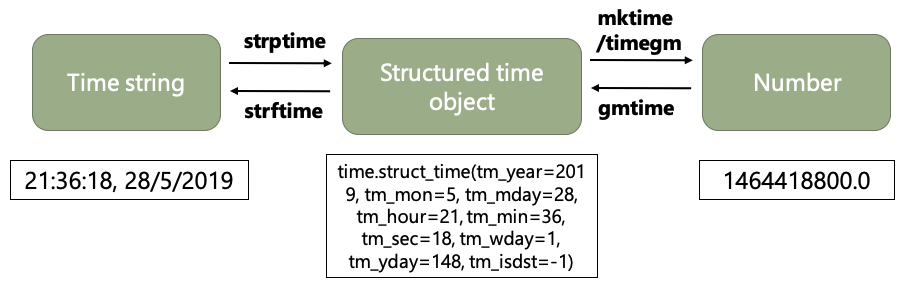

Internally, time is often represented as a number, which allows for easy manipulation and arithmetic:  
* The value (Unix time) is the number of seconds sind Jan 1, 1970 in the UTC timezone  
* but rea datasets generally have time as a "human readable" string
* Our goal here is to convert between these two formats

## `strptime`

First, let's look at converting a string to a structured object (`strptime`)

In [1]:
import time
import calendar

In [2]:
timeString = "2021-07-15 14:36:02"

In [5]:
timeStruct = time.strptime(timeString, "%Y-%m-%d %H:%M:%S")
timeStruct

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=15, tm_hour=14, tm_min=36, tm_sec=2, tm_wday=3, tm_yday=196, tm_isdst=-1)

In [6]:
timeStruct.tm_wday

3

In [7]:
help(time.strptime)

Help on built-in function strptime in module time:

strptime(...)
    strptime(string, format) -> struct_time
    
    Parse a string to a time tuple according to a format specification.
    See the library reference manual for formatting codes (same as
    strftime()).
    
    Commonly used format codes:
    
    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent of either AM or PM.
    
    Other codes may be available on yo

Strptime is convenient when we want to extract features from data:

* E.g. does a date correspond to a weekday or a weekend?
* Converting month names or abbrev (e.g. "Jan") to month numbers
* Dealing with mixed-format data by converting it to a common format
* but if we want to perform arithmetic on timestamps, convertin to a number may be easier

## `time.mktime` and `calendar.timegm`

In [8]:
t1 = calendar.timegm(timeStruct)
t2 = time.mktime(timeStruct)
t1, t2

(1626359762, 1626352562.0)

In [9]:
# Five days later:
t1 + 60*60*24*5

1626791762

* time.mktime() allows us to convert our structered time object to a number  
* **Note**: `mktime` assumes the structure is a local time whereas `timegm` assumes the structure is a UTC time  
* This allows for easy manipulation, arithmetic, and comparison of data

## `time.strftime` and `time.gmtime`

Finally, both of these operations can bereversed, should we wish to format time data as a String or structure.

In [10]:
# Five days later:
time.gmtime(t1 + 60*60*24*5)

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=20, tm_hour=14, tm_min=36, tm_sec=2, tm_wday=1, tm_yday=201, tm_isdst=0)

In [11]:
time.strftime('%Y-%m-%d %H:%M:%S')

'2021-08-15 18:25:34'

## Time and Date - Yelp Reviews

In [12]:
import json
import time

path = "../datasets/yelp_dataset/review.json"
f = open(path, 'r', encoding='utf8')

In [13]:
dataset = []
for i in range(50000):
    dataset.append(json.loads(f.readline()))

In [22]:
dataset[4]

{'review_id': 'sjm_uUcQVxab_EeLCqsYLg',
 'user_id': '0kA0PAJ8QFMeveQWHFqz2A',
 'business_id': '8zehGz9jnxPqXtOc7KaJxA',
 'stars': 4.0,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': "The food is always great here. The service from both the manager as well as the staff is super. Only draw back of this restaurant is it's super loud. If you can, snag a patio table!",
 'date': '2011-07-28 18:05:01'}

In [18]:
timeString = dataset[0]['date']
print(timeString)

2014-10-11 03:34:02


In [25]:
timeStruct = time.strptime(timeString, "%Y-%m-%d %H:%M:%S")
timeStruct

time.struct_time(tm_year=2014, tm_mon=10, tm_mday=11, tm_hour=3, tm_min=34, tm_sec=2, tm_wday=5, tm_yday=284, tm_isdst=-1)

In [26]:
help(time.strptime)

Help on built-in function strptime in module time:

strptime(...)
    strptime(string, format) -> struct_time
    
    Parse a string to a time tuple according to a format specification.
    See the library reference manual for formatting codes (same as
    strftime()).
    
    Commonly used format codes:
    
    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent of either AM or PM.
    
    Other codes may be available on yo

In [28]:
time.strptime("21:36:18 28/5/2021", "%H:%M:%S %d/%m/%Y")

time.struct_time(tm_year=2021, tm_mon=5, tm_mday=28, tm_hour=21, tm_min=36, tm_sec=18, tm_wday=4, tm_yday=148, tm_isdst=-1)

In [29]:
timeInt = time.mktime(timeStruct)
timeInt

1412991242.0

In [31]:
timeInt2 = time.mktime(time.strptime(dataset[99]['date'], "%Y-%m-%d %H:%M:%S"))

In [32]:
timeInt2

1533408887.0

In [33]:
timeDiff = timeInt - timeInt2
timeDiff

-120417645.0

In [34]:
# Number of minutes between the two reviews
timeDiff / 60

-2006960.75

In [35]:
# Number of hours between the two reviews
timeDiff / (60*60)

-33449.34583333333

In [36]:
# Number of days between the 2 reviews
timeDiff / (60*60*24)

-1393.7227430555556

In [37]:
time.gmtime(timeInt)

time.struct_time(tm_year=2014, tm_mon=10, tm_mday=11, tm_hour=1, tm_min=34, tm_sec=2, tm_wday=5, tm_yday=284, tm_isdst=0)

In [38]:
# add a week in seconds to the timeInt
time.gmtime(timeInt + 60*60*24*7)

time.struct_time(tm_year=2014, tm_mon=10, tm_mday=18, tm_hour=1, tm_min=34, tm_sec=2, tm_wday=5, tm_yday=291, tm_isdst=0)